In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, stats
import itertools 

import time

import networkx as nx
from networkx.algorithms import approximation as apx

import pandas as pd
import random

import landscape as ld
import steiner_utils as su

In [3]:
def get_pos(g):
    '''returns dictionary with nodes physical location'''
    return dict( (n, n) for n in g.nodes() )

# Example 1

## Naive Steiner

In [4]:
terminals_1 = [(1, 1), (2, 2), (3, 4), (5, 1), (5, 4), (8, 2), (7, 8), (6,  6), (2,8), (4,3)]
G_1 = su.create_graph(box_size = 10, terminals = terminals_1)

In [5]:
su.graph_info(G_1, verbosity = True)

Number of clusters: 1; Number of nodes: 81; Number of edges: 144; Number of terminals: 10


(1, 81, 144, 10)

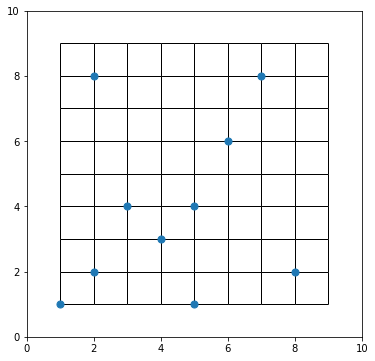

In [6]:
su.plot_graph_on_grid(G_1, box_size = 10)

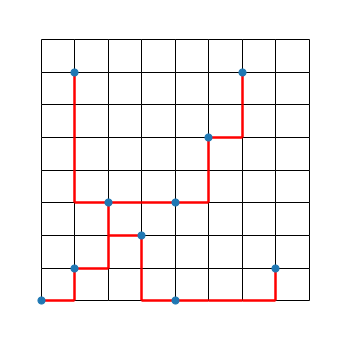

In [7]:
steiner_1 = su.naive_steiner(G_1)
su.plot_graph_on_grid(G_1, box_size = 10, tree = steiner_1)

## Improved Steiner

In [8]:
# create graph with terminals
terminals_1 = [(1, 1), (2, 2), (3, 4), (5, 1), (5, 4), (8, 2), (7, 8), (6,  6), (2,8), (4,3)]
G_1 = su.create_graph(box_size = 10, terminals = terminals_1)

In [9]:
# obtain clusters by using landscape and condition on subgraphs 
clusters_1 = su.trim_graph_landscape(G_1, 
                                     box_size = 10, 
                                     condition = 'n_clusters <= ', 
                                     sigma = 1, 
                                     verbosity = True)

Properties of the original graph: 
Number of clusters: 1; Number of nodes: 81; Number of edges: 144; Number of terminals: 10
For alpha =  0.01
Number of clusters: 7; Number of nodes: 15; Number of edges: 11; Number of terminals: 10


SyntaxError: unexpected EOF while parsing (<string>, line 1)

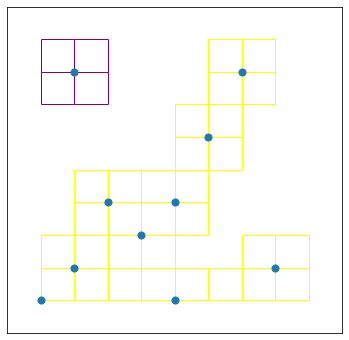

In [19]:
su.plot_many_graphs_on_grid(clusters_1, box_size = 10, fig_size = 6)

In [20]:
# # compute partial steiners
partial_steiners = list(map(su.naive_steiner, clusters_1))

# #join steiners
full_steiner_1 = su.join_all_trees(G_1, partial_steiners)

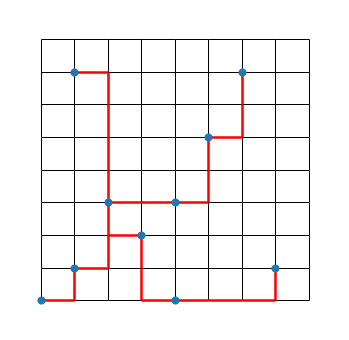

In [21]:
su.plot_graph_on_grid(G_1, box_size = 10, tree = full_steiner_1)

# Example 2
Points selected at random. 

In [22]:
L0 = 40; Nterm = 120
terminals_2 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)

G_2 = su.create_graph(box_size = L0, terminals = terminals_2)
_ = su.graph_info(G_2, verbosity = True)

Number of clusters: 1; Number of nodes: 1521; Number of edges: 2964; Number of terminals: 113


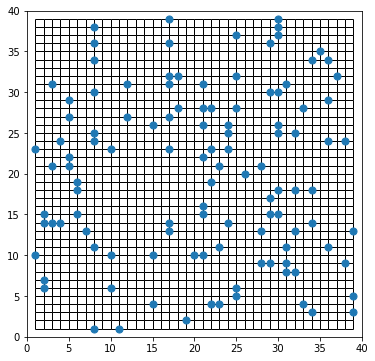

In [23]:
su.plot_graph_on_grid(G_2, box_size = L0)

In [24]:
tic = time.time()
steiner_2 = su.naive_steiner(G_2)

toc = time.time()
print('Calculation took {} sec'.format(toc-tic))
print('Length of Steiner tree {}'.format(len(steiner_2)))  

Calculation took 14.699856281280518 sec
Length of Steiner tree 314


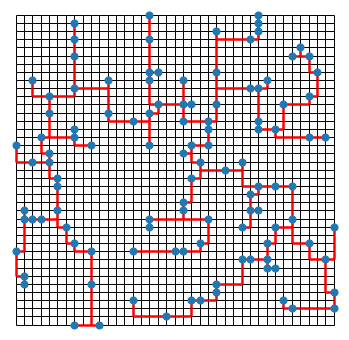

In [25]:
su.plot_graph_on_grid(G_2, box_size = L0, tree = steiner_2)

In [26]:
#import multiprocessing as mp

In [27]:
clusters_2 = su.trim_graph_landscape(G_2,
                                     box_size = L0, 
                                     condition = 'n_clusters <= 8', 
                                     sigma = 1.3,
                                     verbosity = True)

Properties of the original graph: 
Number of clusters: 1; Number of nodes: 1521; Number of edges: 2964; Number of terminals: 113
For alpha =  0.01
Number of clusters: 66; Number of nodes: 256; Number of edges: 212; Number of terminals: 113
For alpha =  0.03
Number of clusters: 38; Number of nodes: 756; Number of edges: 1095; Number of terminals: 113
For alpha =  0.05
Number of clusters: 24; Number of nodes: 899; Number of edges: 1301; Number of terminals: 113
For alpha =  0.06999999999999999
Number of clusters: 13; Number of nodes: 965; Number of edges: 1417; Number of terminals: 113
For alpha =  0.09
Number of clusters: 9; Number of nodes: 1000; Number of edges: 1503; Number of terminals: 113
For alpha =  0.11
Number of clusters: 5; Number of nodes: 1132; Number of edges: 1702; Number of terminals: 113
Trimming condition fulfilled!
Number of clusters: 5; Number of nodes: 1132; Number of edges: 1702; Number of terminals: 113


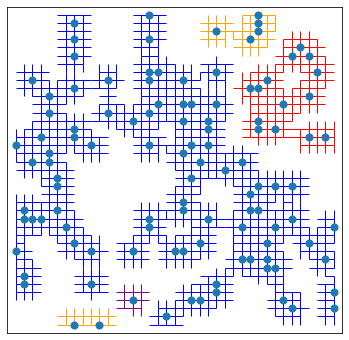

In [28]:
su.plot_many_graphs_on_grid(clusters_2, box_size = L0, fig_size = 6)

In [29]:
tic = time.time()
full_steiner_2 = su.improved_steiner(G_2, 
                                  box_size = L0, 
                                  condition = 'n_clusters <= 4', 
                                  sigma = 1.3, 
                                  verbosity = True)
toc = time.time()
print('Calculation took {} sec'.format(toc-tic))

Properties of the original graph: 
Number of clusters: 1; Number of nodes: 1521; Number of edges: 2964; Number of terminals: 113
For alpha =  0.01
Number of clusters: 66; Number of nodes: 256; Number of edges: 212; Number of terminals: 113
For alpha =  0.03
Number of clusters: 38; Number of nodes: 756; Number of edges: 1095; Number of terminals: 113
For alpha =  0.05
Number of clusters: 24; Number of nodes: 899; Number of edges: 1301; Number of terminals: 113
For alpha =  0.06999999999999999
Number of clusters: 13; Number of nodes: 965; Number of edges: 1417; Number of terminals: 113
For alpha =  0.09
Number of clusters: 9; Number of nodes: 1000; Number of edges: 1503; Number of terminals: 113
For alpha =  0.11
Number of clusters: 5; Number of nodes: 1132; Number of edges: 1702; Number of terminals: 113
For alpha =  0.13
Number of clusters: 3; Number of nodes: 1171; Number of edges: 1781; Number of terminals: 113
Trimming condition fulfilled!
Number of clusters: 3; Number of nodes: 117

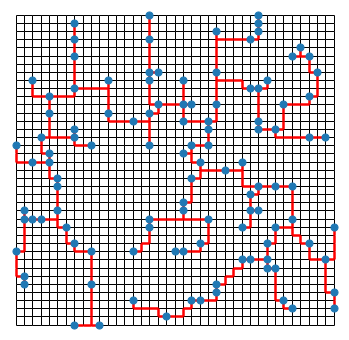

In [30]:
su.plot_graph_on_grid(G_2, box_size = L0, tree = full_steiner_2, fig_size = 6)

In [34]:
for cl in [3, 2, 1]:
    print('number of clusters: ', cl)
    tic = time.time()
    full_steiner_2 = su.improved_steiner(G_2, 
                                      box_size = L0, 
                                      condition = 'n_clusters <= '+str(cl), 
                                      sigma = 1, 
                                      verbosity = False)
    toc = time.time()
    print('Calculation took {} sec'.format(toc-tic))
    print('\n')

number of clusters:  3
Trimming condition fulfilled!
Number of clusters: 3; Number of nodes: 1170; Number of edges: 1752; Number of terminals: 113
Time spent computing clusters:  1.8974809646606445
Time spent computing partial steiners:  7.6811439990997314
Time spent joining partial steiners:  1.7615447044372559
Length of Steiner tree 315
Calculation took 11.34175419807434 sec


number of clusters:  2
Trimming condition fulfilled!
Number of clusters: 1; Number of nodes: 1178; Number of edges: 2078; Number of terminals: 113
Time spent computing clusters:  4.311647891998291
Time spent computing partial steiners:  8.306424140930176
Time spent joining partial steiners:  0.00013875961303710938
Length of Steiner tree 315
Calculation took 12.619534015655518 sec


number of clusters:  1
Trimming condition fulfilled!
Number of clusters: 1; Number of nodes: 1178; Number of edges: 2078; Number of terminals: 113
Time spent computing clusters:  4.356415271759033
Time spent computing partial steiner